## Import Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\anami\Documents\Projects\Churn Prediction\churn.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.shape

(10000, 14)

## Data Cleaning

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Exploratory Data Analysis (EDA)

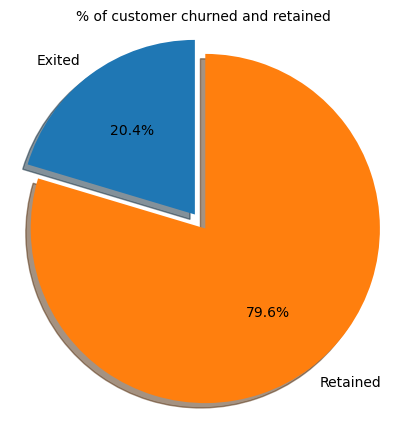

In [12]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("% of customer churned and retained", size = 10)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

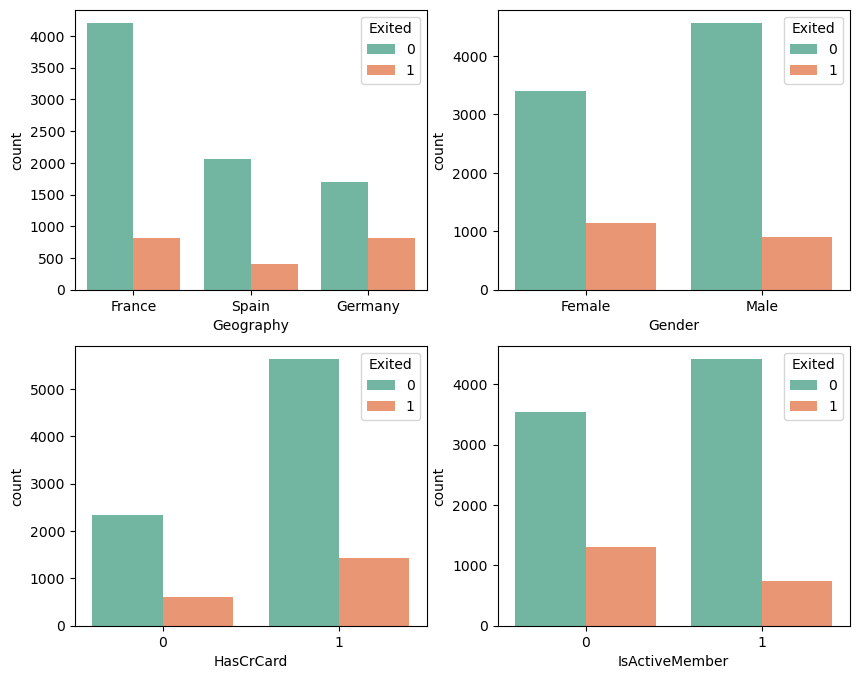

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0], palette="Set2")
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1], palette="Set2")
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0], palette="Set2")
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1], palette="Set2")

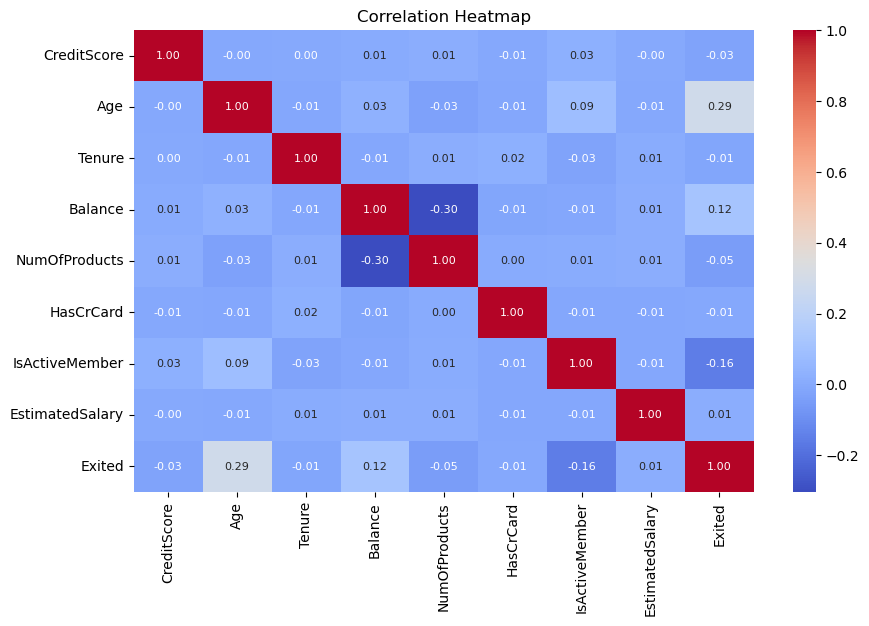

In [14]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [16]:
#Change categorical to numerical value
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [17]:
#One hot-encoding
df = pd.get_dummies(df, columns=['Geography'], drop_first=True, dtype=int)

In [18]:
# Add new features to data
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
df['TenureByAge'] = df.Tenure/(df.Age)
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

In [19]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain', 'BalanceSalaryRatio',
       'TenureByAge', 'CreditScoreGivenAge'],
      dtype='object')

In [20]:
df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.000000,0.047619,14.738095
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0.744677,0.024390,14.829268
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1.401375,0.190476,11.952381
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0,0.000000,0.025641,17.923077
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,1.587055,0.046512,19.767442
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,1,0.759604,0.181818,14.659091
6,822,0,50,7,0.00,2,1,1,10062.80,0,0,0,0.000000,0.140000,16.440000
7,376,1,29,4,115046.74,4,1,0,119346.88,1,1,0,0.963969,0.137931,12.965517
8,501,0,44,4,142051.07,2,0,1,74940.50,0,0,0,1.895518,0.090909,11.386364
9,684,0,27,2,134603.88,1,1,1,71725.73,0,0,0,1.876647,0.074074,25.333333


## Modelling

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

In [23]:
X = df.drop(columns='Exited', axis = 1)
y = df['Exited']

In [24]:
# for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

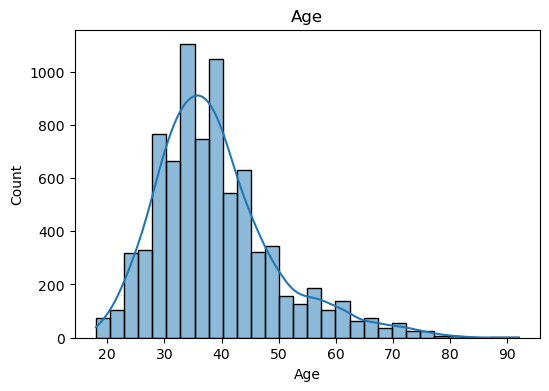

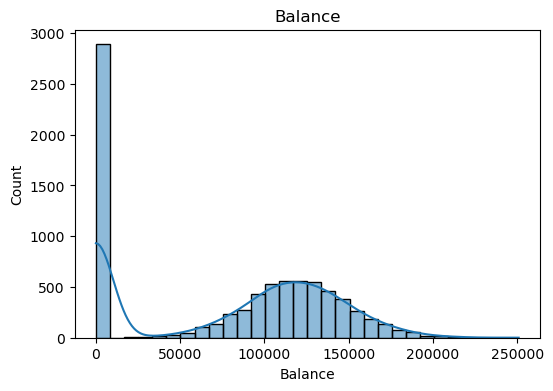

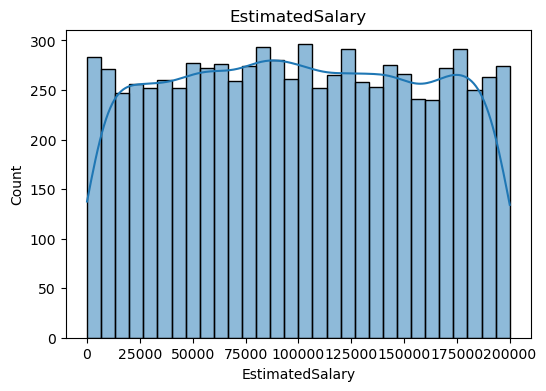

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose your numeric columns
num_cols = X_train[['Age', 'Balance', 'EstimatedSalary']]  # add any other numeric columns

# Plot histograms with KDE (curve)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(col)
    plt.show()



In [26]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge','CreditScoreGivenAge']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [27]:
# Imbalanced Dataset Correction
smote = SMOTE(random_state=2025)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [28]:
print(y_train.value_counts(), y_train_res.value_counts())

Exited
0    6370
1    1630
Name: count, dtype: int64 Exited
0    6370
1    6370
Name: count, dtype: int64


In [29]:
# Import all the models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

In [30]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

In [31]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 100],
        'max_depth': [-1, 10, 20],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 1],
        'kernel': ['rbf', 'linear']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'criterion': ['gini', 'entropy']
    }
}

In [32]:
best_parameters = {}
for name, model in models.items():
    print(name," : ", model)
    grid = RandomizedSearchCV(
        estimator = model,
        param_distributions=param_grids[name],
        n_iter=10,
        cv=3,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )
    grid.fit(X_train_res, y_train_res)
    print(grid.best_params_)

    best_parameters[name] = grid.best_estimator_

Logistic Regression  :  LogisticRegression(max_iter=5000)
{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}
Random Forest  :  RandomForestClassifier()
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Gradient Boosting  :  GradientBoostingClassifier()
{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
LightGBM  :  LGBMClassifier()
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [33]:
best_parameters

{'Logistic Regression': LogisticRegression(C=0.01, max_iter=5000, solver='saga'),
 'Random Forest': RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                        n_estimators=300),
 'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=300,
                            subsample=0.9),
 'LightGBM': LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_depth=10,
                n_estimators=300, num_leaves=100, subsample=0.8),
 'Decision Tree': DecisionTreeClassifier(max_depth=30, min_samples_split=5),
 'SVM': SVC(C=10, gamma='auto', probability=True),
 'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')}


========== Logistic Regression ==========
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1593
           1       0.37      0.68      0.48       407

    accuracy                           0.70      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.70      0.73      2000



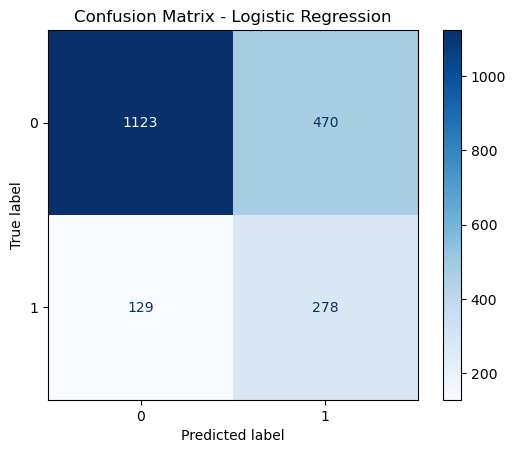


========== Random Forest ==========
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.64      0.60      0.62       407

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



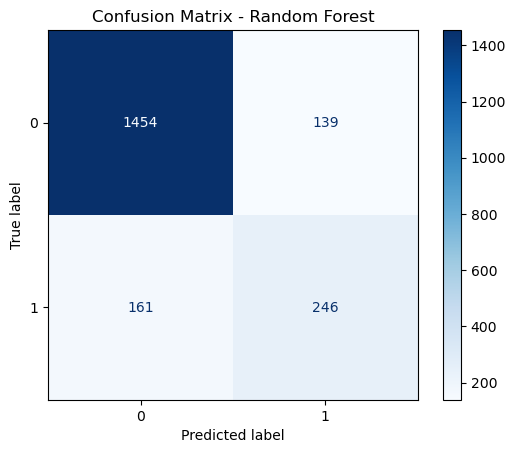


========== Gradient Boosting ==========
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



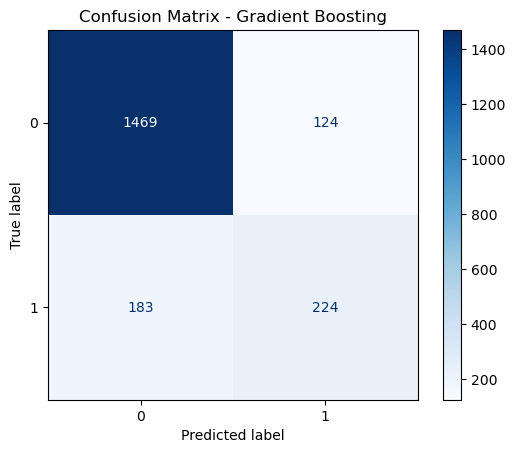


========== LightGBM ==========
[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

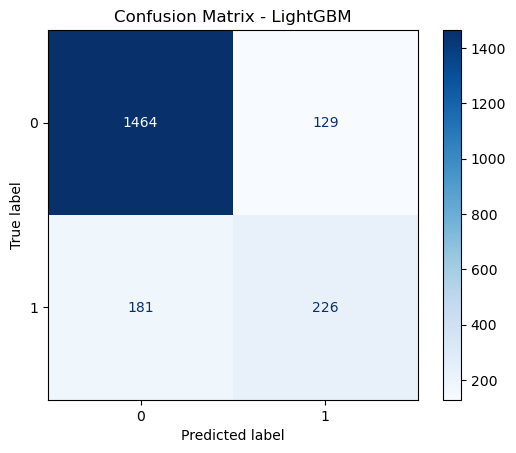


========== Decision Tree ==========
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1593
           1       0.45      0.57      0.50       407

    accuracy                           0.77      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.79      0.77      0.78      2000



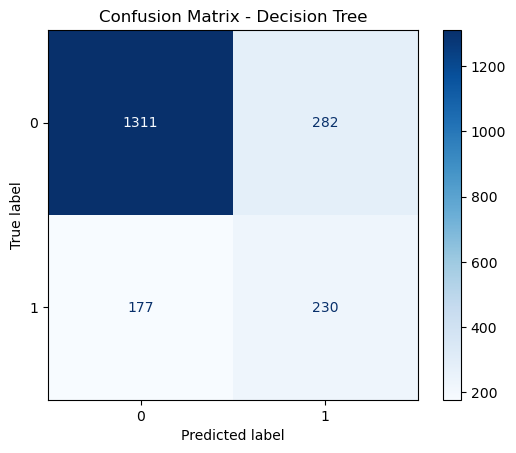


========== SVM ==========
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1593
           1       0.52      0.65      0.58       407

    accuracy                           0.81      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.83      0.81      0.81      2000



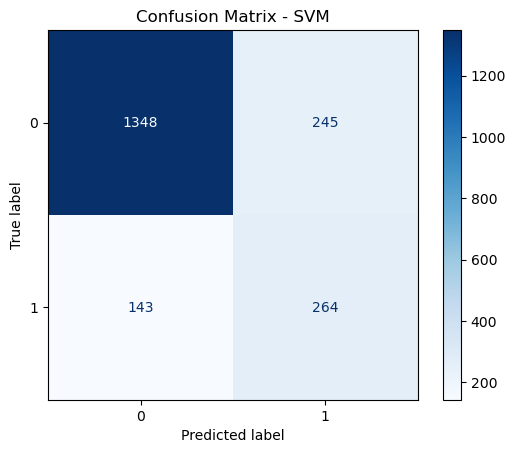


========== KNN ==========
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1593
           1       0.42      0.61      0.50       407

    accuracy                           0.75      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.75      0.76      2000



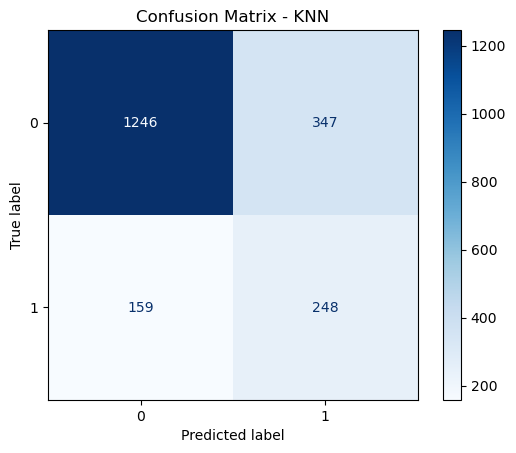

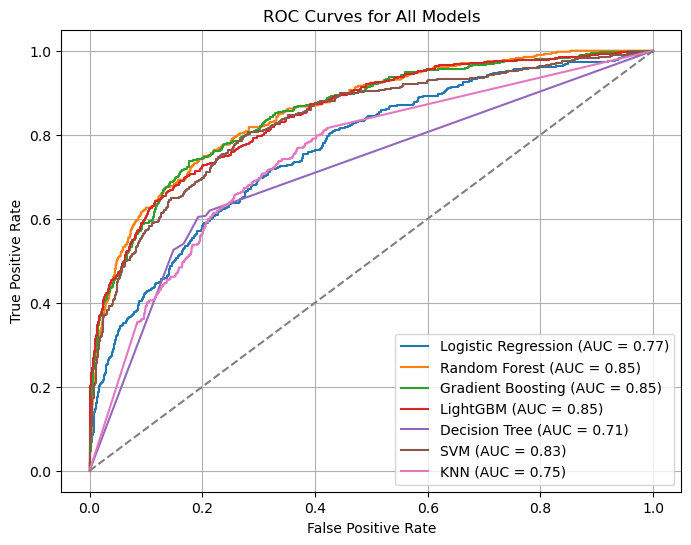

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, roc_auc_score
# Dictionaries to store metrics
metrics_data = {}
roc_data = {}
confusion_matrices = {}
feature_importances = {}

# eature names are in X_train_res.columns
feature_names = X_train_res.columns

for name, model in best_parameters.items():
    print(f"\n{'='*10} {name} {'='*10}")  # Title of the model
    
    # Train model
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    # Store metrics
    metrics_data[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_data[name] = (fpr, tpr, roc_auc)

    # ---- FEATURE IMPORTANCE ----
    if hasattr(model, "feature_importances_"):
        # Tree-based models (RandomForest, XGBoost, etc.)
        importance = model.feature_importances_
        feature_importances[name] = pd.Series(importance, index=feature_names).sort_values(ascending=False)
        
    elif hasattr(model, "coef_"):
        # Linear models (LogisticRegression, LinearSVC, etc.)
        importance = np.abs(model.coef_[0])
        feature_importances[name] = pd.Series(importance, index=feature_names).sort_values(ascending=False)
        

# ROC Curves
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()

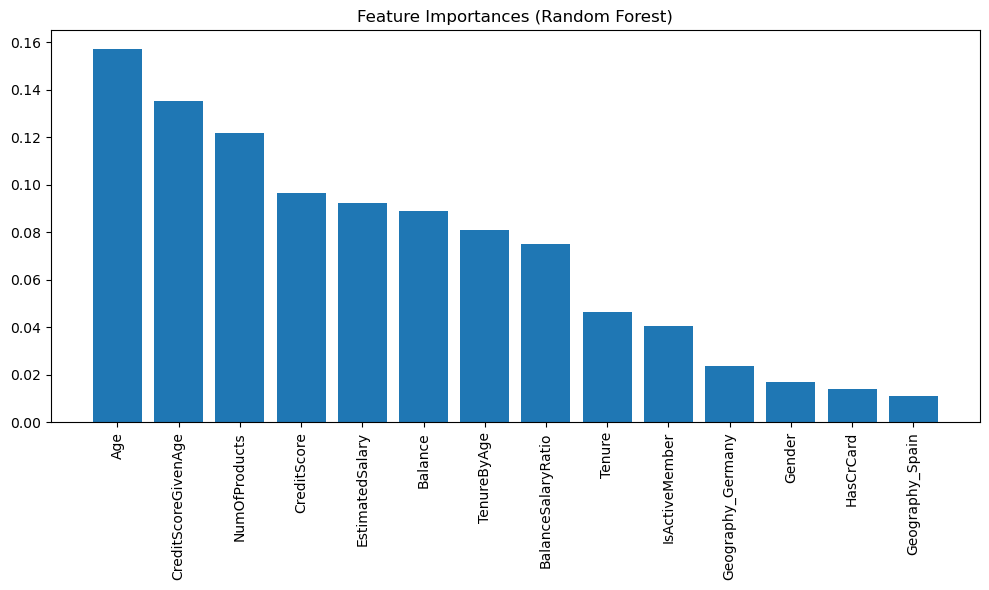

In [35]:
model = RandomForestClassifier()
model.fit(X, y)

# feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Train best models and save them for prediction

rf_model = best_parameters['Random Forest']
rf_model.fit(X_train_res, y_train_res)
#joblib.dump(rf_model, "random_forest_model.pkl")

# --- Train Gradient Boosting ---
gb_model = best_parameters['Gradient Boosting']
gb_model.fit(X_train_res, y_train_res)
#joblib.dump(gb_model, "gradient_boosting_model.pkl")

# --- Train LightGBM ---
lgbm_model = best_parameters['LightGBM']
lgbm_model.fit(X_train_res, y_train_res)
#joblib.dump(lgbm_model, "lightgbm_model.pkl")

[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_depth=10,
               n_estimators=300, num_leaves=100, subsample=0.8)

In [96]:
import joblib
joblib.dump(rf_model, "rf_model.pkl", compress = 3)

['rf_model.pkl']

In [126]:
import cloudpickle
with open("gb_model.pkl", "wb") as f:
    cloudpickle.dump(gb_model, f)

In [98]:
joblib.dump(lgbm_model, "lgbm_model.pkl")

['lgbm_model.pkl']

In [99]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [100]:
joblib.dump(metrics_data, "metrics_data.pkl")

['metrics_data.pkl']

In [101]:
joblib.dump(roc_data, "roc_data.pkl")

['roc_data.pkl']

In [104]:
joblib.dump(feature_importances, "feature_importances.pkl")

['feature_importances.pkl']

In [110]:
joblib.dump(confusion_matrices, "confusion_matrices_data.pkl")

['confusion_matrices_data.pkl']